<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.242245,-1.028954,61.213291,37.964527,23.248764
1,0.0,1.0,73.726413,-191.336958,-107.610545,72.314884,-179.925429
2,0.0,2.0,97.393943,-21.845424,85.548519,110.156150,-24.607631
3,0.0,3.0,82.828916,-352.024513,-259.195596,86.868589,-346.064185
4,0.0,4.0,41.150792,126.625557,177.776349,20.230754,157.545595
...,...,...,...,...,...,...,...
19995,999.0,15.0,78.379007,115.744814,204.123821,130.214746,73.909074
19996,999.0,16.0,66.806609,103.279232,180.085841,113.513511,66.572330
19997,999.0,17.0,40.605063,159.418634,210.023697,75.699550,134.324146
19998,999.0,18.0,89.918917,175.770538,275.689456,146.869096,128.820360


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    52.242245   -1.028954   61.213291   37.964527   23.248764
      1.0    73.726413 -191.336958 -107.610545   72.314884 -179.925429
      2.0    97.393943  -21.845424   85.548519  110.156150  -24.607631
      3.0    82.828916 -352.024513 -259.195596   86.868589 -346.064185
      4.0    41.150792  126.625557  177.776349   20.230754  157.545595
...                ...         ...         ...         ...         ...
999.0 15.0   78.379007  115.744814  204.123821  130.214746   73.909074
      16.0   66.806609  103.279232  180.085841  113.513511   66.572330
      17.0   40.605063  159.418634  210.023697   75.699550  134.324146
      18.0   89.918917  175.770538  275.689456  146.869096  128.820360
      19.0   39.919125   16.813981   66.733106   74.709607   -7.976501

[20000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    52.242245   -1.028954   61.213291   37.964527   23.248764
      1.0    73.726413 -191.336958 -107.610545   72.314884 -179.925429
      2.0    97.393943  -21.845424   85.548519  110.156150  -24.607631
      3.0    82.828916 -352.024513 -259.195596   86.868589 -346.064185
      4.0    41.150792  126.625557  177.776349   20.230754  157.545595
...                ...         ...         ...         ...         ...
999.0 15.0   78.379007  115.744814  204.123821  130.214746   73.909074
      16.0   66.806609  103.279232  180.085841  113.513511   66.572330
      17.0   40.605063  159.418634  210.023697   75.699550  134.324146
      18.0   89.918917  175.770538  275.689456  146.869096  128.820360
      19.0   39.919125   16.813981   66.733106   74.709607   -7.976501

[20000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.242245,-1.028954,61.213291,37.964527,23.248764
1,0.0,1.0,73.726413,-191.336958,-107.610545,72.314884,-179.925429
2,0.0,2.0,97.393943,-21.845424,85.548519,110.156150,-24.607631
3,0.0,3.0,82.828916,-352.024513,-259.195596,86.868589,-346.064185
4,0.0,4.0,41.150792,126.625557,177.776349,20.230754,157.545595
...,...,...,...,...,...,...,...
19995,999.0,15.0,78.379007,115.744814,204.123821,130.214746,73.909074
19996,999.0,16.0,66.806609,103.279232,180.085841,113.513511,66.572330
19997,999.0,17.0,40.605063,159.418634,210.023697,75.699550,134.324146
19998,999.0,18.0,89.918917,175.770538,275.689456,146.869096,128.820360


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    52.242245   -1.028954   61.213291   37.964527   23.248764
      1.0    73.726413 -191.336958 -107.610545   72.314884 -179.925429
      2.0    97.393943  -21.845424   85.548519  110.156150  -24.607631
      3.0    82.828916 -352.024513 -259.195596   86.868589 -346.064185
      4.0    41.150792  126.625557  177.776349   20.230754  157.545595
...                ...         ...         ...         ...         ...
999.0 15.0   78.379007  115.744814  204.123821  130.214746   73.909074
      16.0   66.806609  103.279232  180.085841  113.513511   66.572330
      17.0   40.605063  159.418634  210.023697   75.699550  134.324146
      18.0   89.918917  175.770538  275.689456  146.869096  128.820360
      19.0   39.919125   16.813981   66.733106   74.709607   -7.976501

[20000 rows x 5 columns]

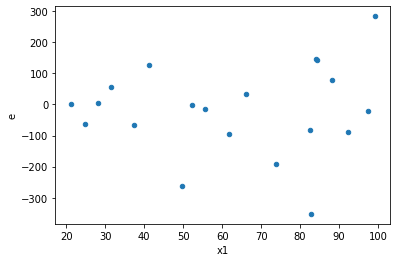

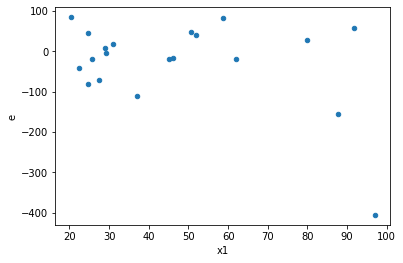

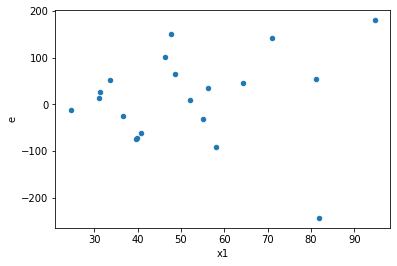

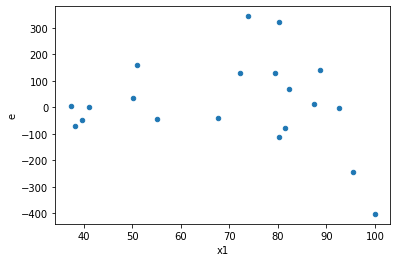

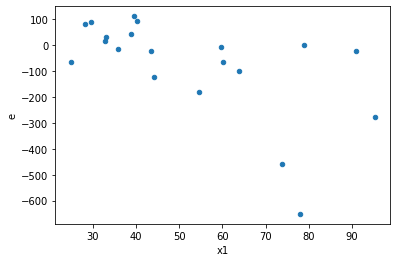

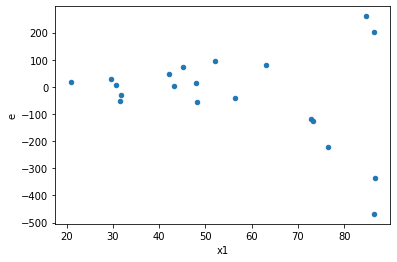

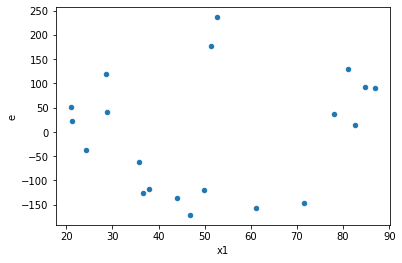

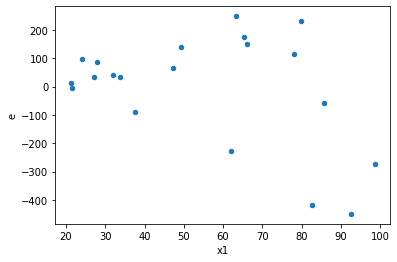

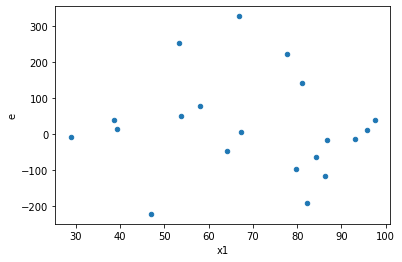

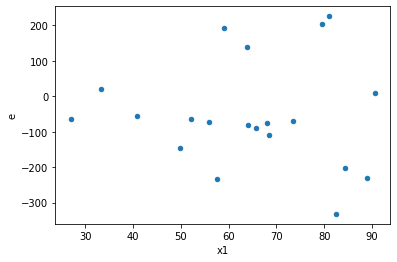

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,10.0,85712.50531994077,271763.57958495815,10714.063164992596,27176.357958495813,2.5365127627110264,0.1693826755830612,0.9153086622084694,0.0846913377915306,Reject001=1 : Homoscedasticity
2.0,14.0,4.0,66009.33762286436,109691.99315774282,4714.952687347454,27422.998289435705,5.8161767694986946,0.10170378472728814,0.9491481076363559,0.05085189236364407,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,33202.660826600906,436906.2072958626,3689.1845362889894,48545.13414398473,13.158770906271084,0.0007115467099092498,0.9996442266450454,0.0003557733549546249,Reject001=0 : Heteroscedasticity
9.0,7.0,11.0,107097.58505033204,313197.0398365031,15299.655007190291,28472.458166954828,1.8609869407887818,0.34317588928737663,0.8284120553563117,0.17158794464368832,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,17750.413346270954,234512.5960060032,1972.2681495856616,26056.955111778134,13.211669578121127,0.0007002618535845162,0.9996498690732077,0.0003501309267922581,Reject001=0 : Heteroscedasticity
12.0,7.0,11.0,29772.890405853046,440249.9604904743,4253.270057979006,40022.72368095221,9.409871260319054,0.0013868297795682771,0.9993065851102159,0.0006934148897841386,Reject001=0 : Heteroscedasticity
13.0,11.0,7.0,50182.00530413472,101247.84576211935,4562.000482194066,14463.97796601705,3.1705340721622832,0.13642277148888304,0.9317886142555585,0.06821138574444152,Reject001=1 : Homoscedasticity
17.0,7.0,11.0,24597.441664275993,156264.6361806569,3513.9202377537135,14205.876016423355,4.042742878393994,0.03915221035329197,0.980423894823354,0.019576105176645986,Reject001=1 : Homoscedasticity
18.0,10.0,8.0,91858.86919456504,280660.2399876398,9185.886919456503,35082.52999845498,3.8191772123982,0.06982479819588572,0.9650876009020571,0.03491239909794286,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,10.0,85712.50531994077,271763.57958495815,10714.063164992596,27176.357958495813,2.5365127627110264,0.1693826755830612,Reject001=1 : Homoscedasticity
1.0,5.0,13.0,106237.67379401119,38662.78800070983,21247.534758802238,2974.0606154392176,0.13997203201219147,0.04058772911604136,Reject001=1 : Homoscedasticity
2.0,14.0,4.0,66009.33762286436,109691.99315774282,4714.952687347454,27422.998289435705,5.8161767694986946,0.10170378472728814,Reject001=1 : Homoscedasticity
3.0,12.0,6.0,327335.995546973,30022.864252072748,27277.99962891442,5003.810708678791,0.1834375972120331,0.012434972765733725,Reject001=1 : Homoscedasticity
4.0,7.0,11.0,393957.8126183883,66376.63358385737,56279.68751691262,6034.239416714307,0.10721877968673789,0.006943000275031144,Reject001=0 : Heteroscedasticity
5.0,7.0,11.0,448546.0995459409,24726.03609534206,64078.014220848694,2247.8214632129148,0.03507944948895676,0.00018867789341794056,Reject001=0 : Heteroscedasticity
6.0,12.0,6.0,202199.9557697654,18742.97591160882,16849.996314147116,3123.8293186014703,0.1853905045651986,0.012965900426355618,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,33202.660826600906,436906.2072958626,3689.1845362889894,48545.13414398473,13.158770906271084,0.0007115467099092498,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,185530.38475902213,134331.3639444432,20614.4871954469,14925.707104938134,0.7240396990440179,0.6382600346793408,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      625
Reject001=0 : Heteroscedasticity    375
Name: Result_test, dtype: int64